In [52]:
import librosa
import numpy as np
from pydub import AudioSegment
from sklearn import preprocessing
from matplotlib import pyplot as plt
from scipy import signal
import pandas as pd

In [53]:
pathAudio = 'C:/Users/Admin/Downloads/Technology Lab/sampling/train-stochastic/'
files = librosa.util.find_files(pathAudio, ext=['wav'])
files = sorted(files, key=lambda x: int(x.split('_')[-1].split(".")[0]))

In [54]:
import os
os.path.basename(files[0])

'Tea K Pea - nauticals_1.wav'

In [55]:
from pathlib import Path

Path(files[0]).stem

'Tea K Pea - nauticals_1'

In [57]:
samples = []
max_len = 0
for file_name in files:
    song, sr = librosa.load(file_name)
    resampled_part = signal.resample(song, int(len(song)/15))
    max_len += len(resampled_part)
    samples.append(resampled_part)
max_len

326330

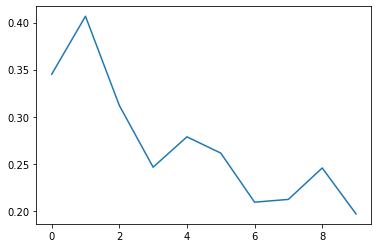

In [127]:
plt.plot(samples[80][110:120])
plt.show()

In [58]:
samples = np.array(samples)
full_song = []
for sample in samples:
    full_song.extend(sample)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9356\2919224953.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array(samples)


In [59]:
full_song = np.array(full_song)
full_song.shape

(326330,)

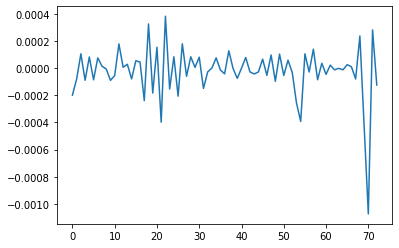

In [50]:
plt.plot(samples[9])
plt.show()

In [60]:
frami = pd.DataFrame(columns=['actual'], data=full_song[:100000])
frami

,actual
0,-0.022670
1,0.006272
2,-0.003801
3,0.002728
4,-0.002127
...,...
99995,0.470886
99996,0.551510
99997,0.206552
99998,0.136482


In [78]:
prev_batch_size = 880 * 2
next_batch_size = 60
sum_batch_size = prev_batch_size+next_batch_size
X = []
Y = []
for i in range(0, len(full_song)-prev_batch_size):
    if i < len(full_song)-sum_batch_size:
        Y.append(full_song[i+prev_batch_size:i+sum_batch_size])
        X.append(np.array(full_song[i:i+prev_batch_size]))

In [81]:
X = np.array(X)
X.shape

(324510, 1760)

In [83]:
X = np.array(X).reshape(-1, prev_batch_size, 1)
Y = np.array(Y).reshape(-1, next_batch_size)

In [84]:
X.shape

(324510, 1760, 1)

In [85]:
Y.shape

(324510, 60)

In [86]:
from keras.layers import LSTM, Dense, Conv1D, MaxPool1D, ConvLSTM1D, Reshape
from keras.models import  Sequential

model = Sequential()
model.add(Conv1D(filters=20, kernel_size=1000, input_shape=(1760, 1)))
model.add(MaxPool1D(pool_size=10, strides=5))
model.add(LSTM(100, activation='sigmoid'))
model.add(Dense(60))
'''model = Sequential()
model.add(Conv1D(filters=20, kernel_size=1000, input_shape=(1760, 1)))
model.add(MaxPool1D(pool_size=10, strides=2))
model.add(Reshape((-1, 376, 20)))
model.add(ConvLSTM1D(filters=100, kernel_size=100))
model.add(LSTM(100, activation='sigmoid'))
model.add(Dense(60))'''

model.compile(optimizer='rmsprop', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 761, 20)           20020     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 151, 20)          0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 100)               48400     
                                                                 
 dense_1 (Dense)             (None, 60)                6060      
                                                                 
Total params: 74,480
Trainable params: 74,480
Non-trainable params: 0
_________________________________________________________________


In [66]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [87]:
model.fit(X, Y, epochs=1)

10141/10141 [==============================] - 721s 71ms/step - loss: 0.0210


In [20]:
filename = 'model_weights.h5'
model.save(filename)

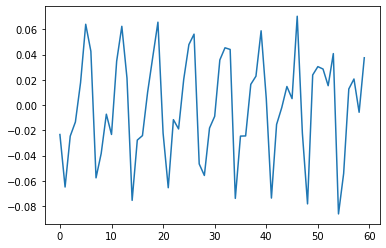

In [111]:
nr = 200000
plt.plot(X[nr+1].reshape(prev_batch_size, 1)[:60])
plt.show()

In [112]:
'''example = X[11000].reshape(1, 1, 1760, 1)'''
example = X[nr]
example = example.reshape(1, 1760, 1)
example.shape

(1, 1760, 1)

In [113]:
'''pred = model.predict(example)'''
pred = model.predict(example)
example

array([[[ 0.0724928 ],
        [-0.0232936 ],
        [-0.06484953],
        ...,
        [ 0.4687751 ],
        [ 0.66712546],
        [ 0.6688719 ]]], dtype=float32)

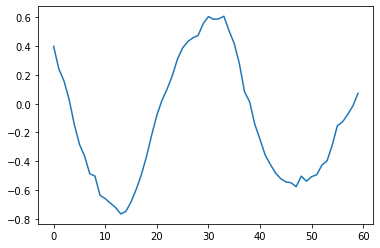

In [115]:
plt.plot(pred[0])
plt.show()